In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imageio.v2 as imageio

%matplotlib inline

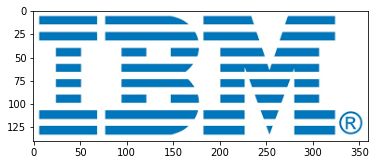

In [4]:

# Read in the image
image = imageio.imread(r'C:\Users\Rui\Desktop\RTAFall2022Projects\Logos\IBM_logo.png')
# Make a copy of the image
image_copy = np.copy(image)
plt.imshow(image_copy)

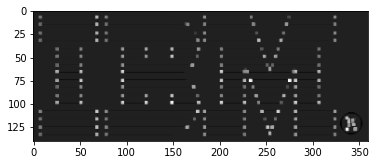

In [6]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')

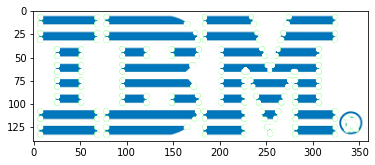

In [7]:
# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller and see what happens
thresh = 0.1*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)

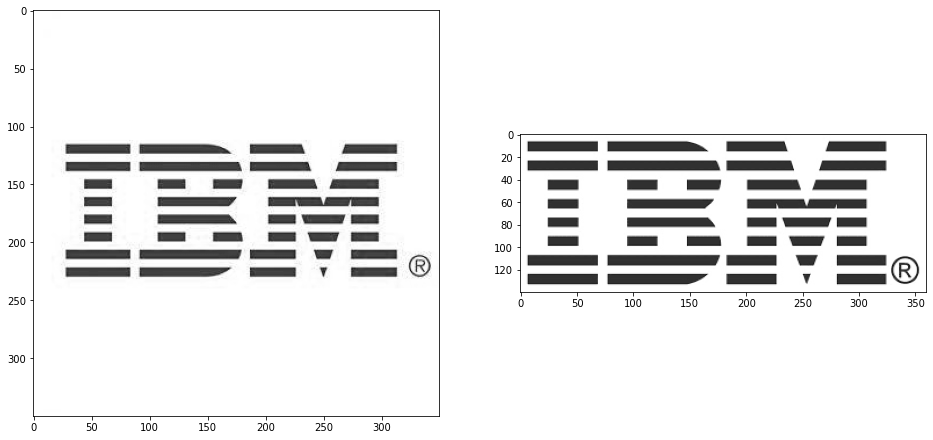

In [11]:
img1 = imageio.imread(r'C:\Users\Rui\Desktop\RTAFall2022Projects\Logos\IBM_logo2.png')  
img2 = imageio.imread(r'C:\Users\Rui\Desktop\RTAFall2022Projects\Logos\IBM_logo.png') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

In [12]:
#sift
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_2)

(331, 250)

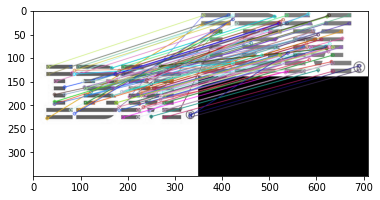

(<matplotlib.image.AxesImage at 0x25388163fd0>, None)

In [13]:
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches, img2, flags=2)
plt.imshow(img3),plt.show()